## Intern Name - Paresh Devlekar

# Prediction using Unsupervised Learning

## TASK 2
**To Explore Unsupervised Machine Learning**

    From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


## Importing the Required Libraries

In [2]:
# importing libraries
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the iris dataset

In [45]:
df = pd.read_csv('iris.csv')
df.drop(['Id'], axis = 'columns', inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844,1.006803
std,0.829100,0.437009,1.759111,0.757874,0.815069
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
df.isnull().sum() # df.isnull().any()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.drop_duplicates(inplace = True)

### Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species'].value_counts()

1    50
2    49
0    48
Name: Species, dtype: int64

## PetalLengthCm vs PetalWidthCm
> We will compare our final plot with this graph to check how accurate our model is

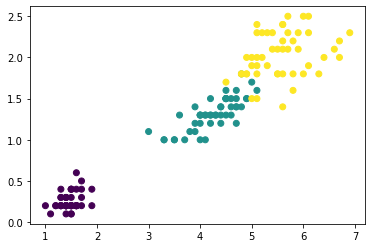

In [12]:
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c = df.Species.values)

In [13]:
df.corr()
# Measure of the linear relationship between two variables.
# For variables x & y, if an increase in x causes a corresponding increase in y, then x & y are positively correlated.
# If a decrease in variable x causes a corresponding decrease in y, then x & y are negatively correlated.
# If there is no relation in x & y values, then they are said to have correlation value as 0.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693
Species,0.782904,-0.418348,0.948339,0.955693,1.000000


### Data Visualization

<AxesSubplot:>

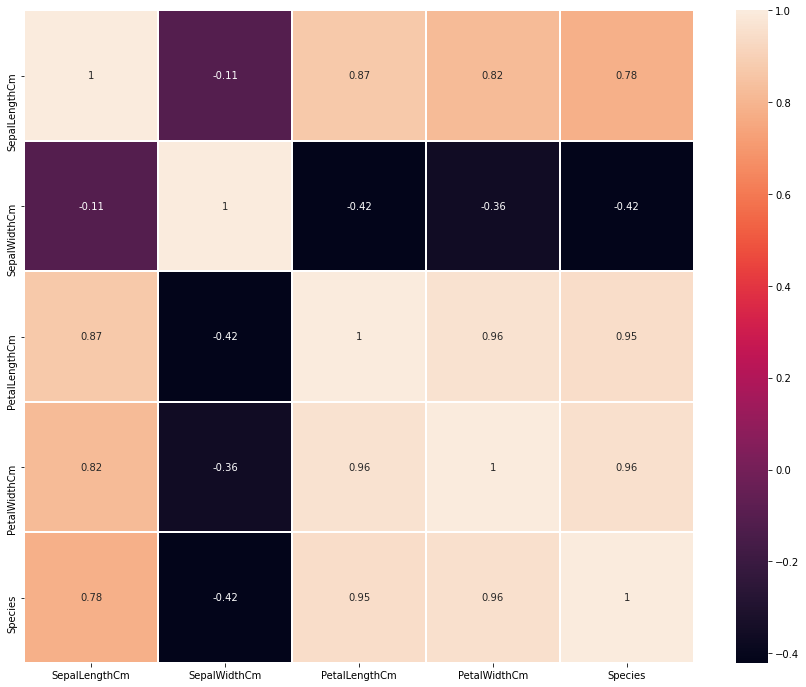

In [14]:
fig = plt.figure(figsize = (15,12))
sns.heatmap(df.corr(), linewidths = 1, annot = True)

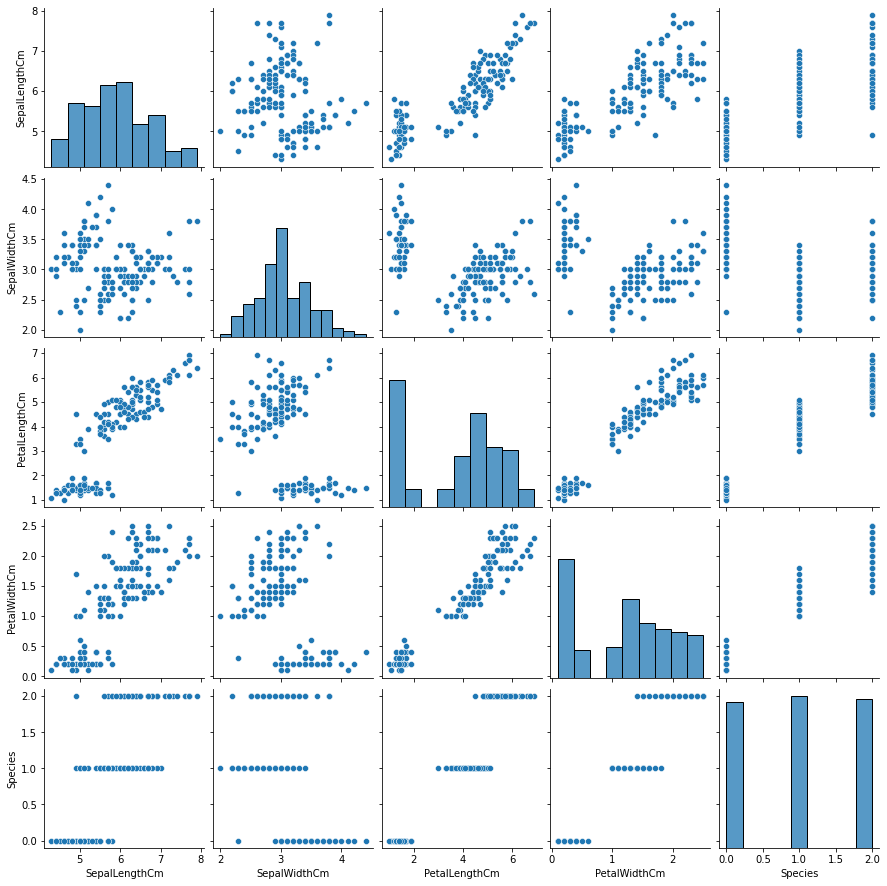

In [15]:
sns.pairplot(df)

*We can see that species mainly depends on Petal Length and Petal Width*

In [23]:
df=df.iloc[:,[0,1,2,3]].values

**K-Means Clustering Algorithm -**

    1. Start with K centroids by putting them at random place.
    
    2. Compute the distance of every point from centroid and cluster them accordingly. 
    
       The simple mathematical way to identify the distance is to draw a line connecting the centroids and then draw a 
       perpendicular line. Any point on the either side of the line belongs to that cluster.
       
    3. Adjust centroids so that they become center of gravity for given cluster.
    
    4. Again re-cluster every point based on their distance with centroid.
    
    5. Again adjust centroids.
    
    6. Recompute clusters and repeat this procedure until the data points stop changing clusters.
    
**How to determine correct number of clusters? ---> Elbow Method** 
    
    1. Start with some value of k. 
    
    2. Compute Sum of squared errors i.e. For each of the clusters try to find the distance of individual data points from
       centroid, square it and calculate the sum.
       
    3. Similarly, compute error for other clusters.
    
    4. In the end, we get the total sum of squared errors.
    
As the number of cluster increases, SSE(Sum of squared errors) decreases. And at a point when number of clusters is equal to the number of data points, SSE becomes 0.

**The general guideline is to find an Elbow.**

### Elbow Method using within-cluster-sum-of-squares(wcss)

In [24]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
wcss

[663.8952380952379,
 151.77145833333344,
 77.91989035087717,
 56.642370650183146,
 45.81642192982454,
 38.38097880813144,
 34.11707094757095,
 29.75801580972634,
 27.744997920380285,
 25.76965268228504]

### Using Elbow graph to find the optimum no of clusters

c:\users\paresh devlekar\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


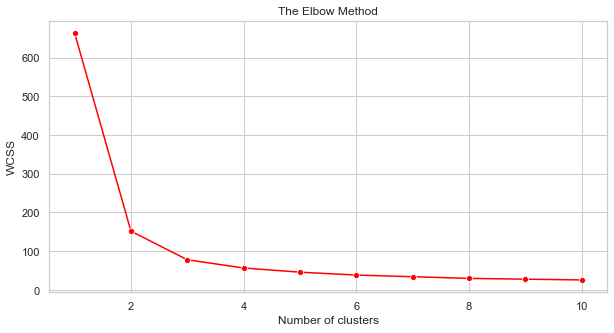

In [25]:
plt.figure(figsize = (10, 5))
sns.set(style = 'whitegrid')
sns.lineplot(range(1, 11), wcss, marker = 'o', color = 'red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**The optimal value of K would be 3. As we can see that with an increase in number of clusters the WCSS value decreases. We select the value of K on the basis of rate of decrease in WCSS and we can see that after 3 the drop in WCSS is minimal**

## Initialization using K-means++

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2])

In [30]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.01041667, 3.43125   , 1.4625    , 0.25      ],
       [5.90327869, 2.74918033, 4.38196721, 1.42622951]])

### Visualizing the clusters

<ipython-input-41-414bb54e5e30>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df[y_kmeans == 2, 2], df[y_kmeans == 2, 3], s = 100, c = 'seagreen', Label = 'Iris-versicolor')
<ipython-input-41-414bb54e5e30>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df[y_kmeans == 1, 2], df[y_kmeans == 1, 3], s = 100, c = 'purple', Label = 'Iris-setosa')
<ipython-input-41-414bb54e5e30>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df[y_kmeans == 0, 2], df[y_kmeans == 0, 3], s = 100, c = 'yellow', Label = 'Iris-virginica')
<ipython-input-41-414bb54e5e30>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  p

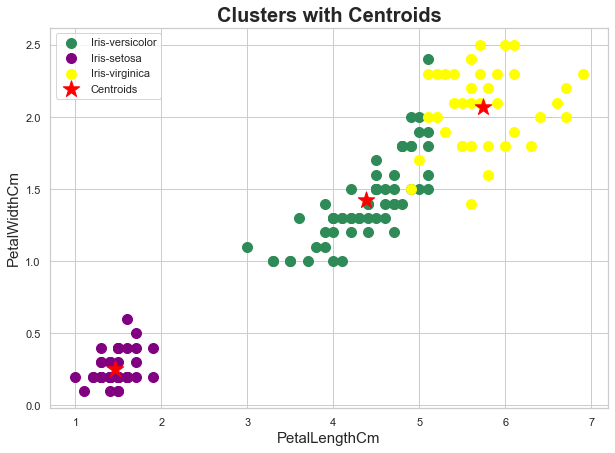

In [41]:
fig = plt.figure(figsize = (10, 7))
plt.title('Clusters with Centroids', fontweight = 'bold', fontsize = 20)
plt.scatter(df[y_kmeans == 2, 2], df[y_kmeans == 2, 3], s = 100, c = 'seagreen', Label = 'Iris-versicolor')
plt.scatter(df[y_kmeans == 1, 2], df[y_kmeans == 1, 3], s = 100, c = 'purple', Label = 'Iris-setosa')
plt.scatter(df[y_kmeans == 0, 2], df[y_kmeans == 0, 3], s = 100, c = 'yellow', Label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 300, c = 'red', marker = '*', Label = 'Centroids' )
plt.xlabel('PetalLengthCm', fontsize = 15)
plt.ylabel('PetalWidthCm', fontsize = 15)
plt.legend()

*We see that our predicted graph is quite similar to the actual one*

### Thank You!!